In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

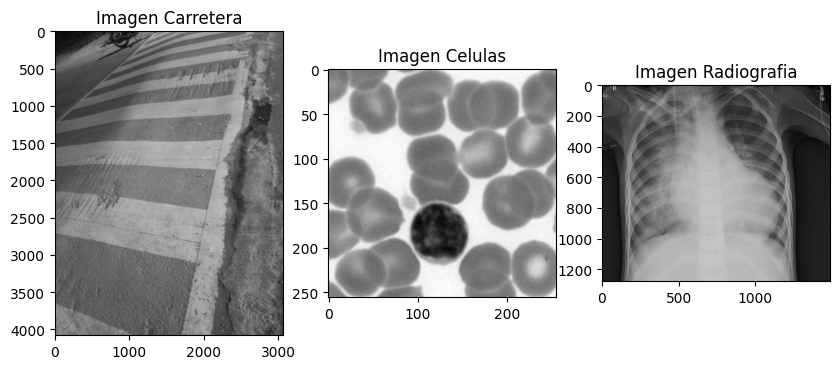

In [36]:
image = cv2.imread('../../IMAGES/20230113_20_57_12_575_000_zGaC6yksz9cwl3UOetH2K4URrOs2_F_4080_3060.jpg', 0)
img1 = np.copy(image)
image = cv2.imread('../../IMAGES/image-cell.png', 0)
img2 = np.copy(image)
image = cv2.imread('../../IMAGES/person_bacteria.jpeg', 0)
img3 = np.copy(image)

fig, ax = plt.subplots(1,3, figsize=(10,10))
ax[0].imshow(img1,  cmap='gray')
ax[0].title.set_text('Imagen Carretera')
ax[1].imshow(img2,  cmap='gray')
ax[1].title.set_text('Imagen Celulas')
ax[2].imshow(img3,  cmap='gray')
ax[2].title.set_text('Imagen Radiografia')

In [22]:
# Metodo de Bernsen
def bernsen_thresolding(image, k):
    wid, hght = image.shape
    newImage = np.copy(image)

    # Radio de la vecindad
    radius = k//2

    for i in range(radius+1, wid-radius):
        for j in range(radius+1, hght-radius):
            # Definir vecindad
            nb = image[i-radius:i+radius+1,j-radius:j+radius+1]

            # Obtener el maximo y minimo de la vecindad
            minNb = np.min(nb)
            maxNb = np.max(nb)
            
            # Valor de umbral
            tValue = (minNb + maxNb) / 2

            # Diferencia de contraste mayor en la vecindad
            difC = maxNb - minNb

            # Definir si el contraste es menor al minimo pasado como parametro
            if (difC < k):
                nClass = 255 # La vecindad completa es una clase
            else:
                nClass = tValue
            
            # Umbralizar el pixel
            if(image[i,j] < nClass):
                newImage[i,j] = 255
            else:
                newImage[i,j] = 0
    return newImage

In [37]:
img1 = cv2.resize(img1,(765, 1020), interpolation = cv2.INTER_LINEAR) # Resize de la imagen para mayor velocidad
imgBernsen1 = bernsen_thresolding(img1, 15)
imgBernsen2 = bernsen_thresolding(img2, 15)
imgBernsen3 = bernsen_thresolding(img3, 15)

C:\Users\HP\AppData\Local\Temp\ipykernel_6060\827412529.py:19: RuntimeWarning: overflow encountered in ubyte_scalars
  tValue = (minNb + maxNb) / 2


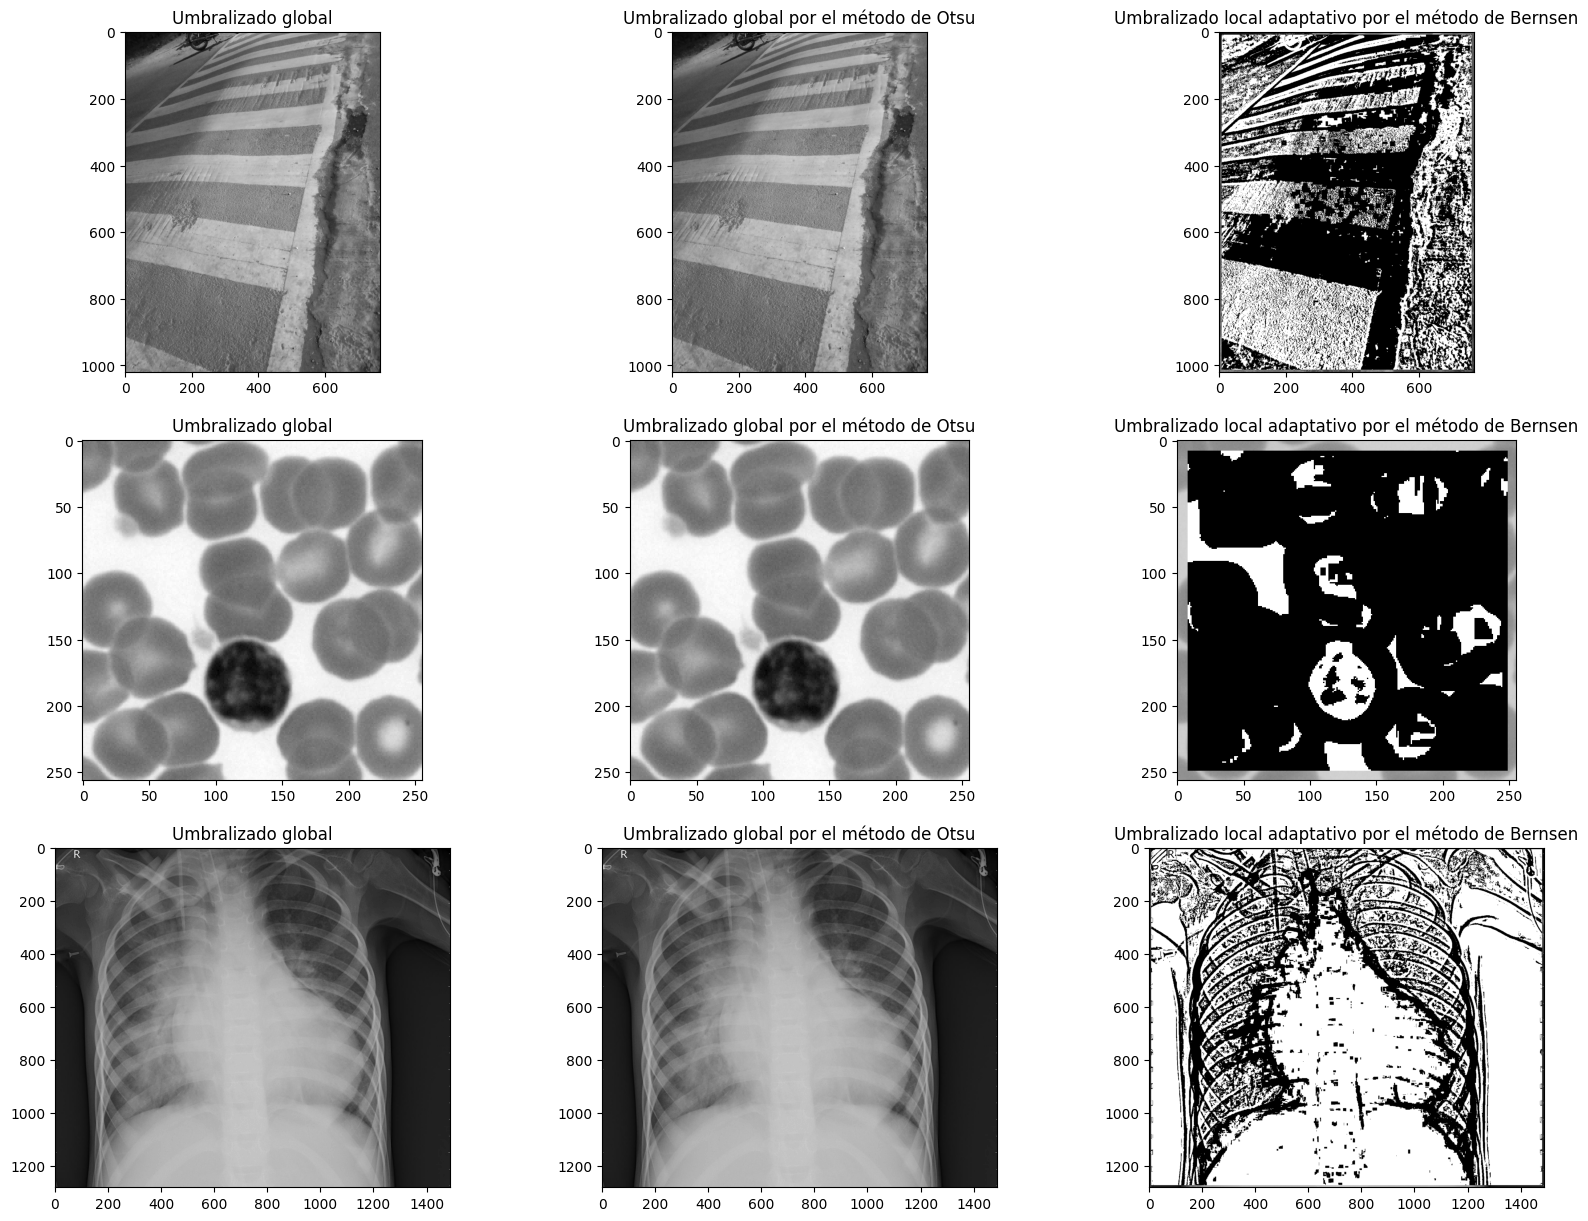

In [45]:
fig, ax = plt.subplots(3,3, figsize=(20,15))
ax[0,0].imshow(img1, cmap='gray')
ax[0,0].title.set_text('Umbralizado global')

ax[0,1].imshow(img1, cmap='gray')
ax[0,1].title.set_text('Umbralizado global por el método de Otsu')

ax[0,2].imshow(imgBernsen1, cmap='gray')
ax[0,2].title.set_text('Umbralizado local adaptativo por el método de Bernsen')


ax[1,0].imshow(img2, cmap='gray')
ax[1,0].title.set_text('Umbralizado global')

ax[1,1].imshow(img2, cmap='gray')
ax[1,1].title.set_text('Umbralizado global por el método de Otsu')

ax[1,2].imshow(imgBernsen2, cmap='gray')
ax[1,2].title.set_text('Umbralizado local adaptativo por el método de Bernsen')


ax[2,0].imshow(img3, cmap='gray')
ax[2,0].title.set_text('Umbralizado global')

ax[2,1].imshow(img3, cmap='gray')
ax[2,1].title.set_text('Umbralizado global por el método de Otsu')

ax[2,2].imshow(imgBernsen3, cmap='gray')
ax[2,2].title.set_text('Umbralizado local adaptativo por el método de Bernsen')